In [70]:
import time
import atoti as tt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [71]:
session = tt.Session.start()

In [72]:
 df = pd.read_excel("Economic_freedom.xlsx", sheet_name="EFW Data 2024 Report", header=4, engine='openpyxl')

In [73]:
df.drop(df.columns[0], axis=1, inplace=True)

In [74]:
original_columns = df.columns.tolist()
original_columns

['Year',
 'ISO Code 2',
 'ISO Code 3',
 'Countries',
 ' Economic Freedom Summary Index',
 'Rank',
 'Quartile',
 'Government consumption',
 'data',
 'Transfers and subsidies',
 'data.1',
 'Government investment',
 'data.2',
 'Top marginal income tax rate',
 'data.3',
 'Top marginal income and payroll tax rate',
 'data.4',
 'Top marginal tax rate',
 'State ownership of Assets',
 'Size of Government',
 'Area 1 Rank',
 'Judicial independence',
 'Impartial courts',
 'Protection of property rights',
 'Military interference in rule of law and politics',
 'Integrity of the legal system',
 'Legal enforcement of contracts',
 'Regulatory restrictions on the sale of real property',
 'Reliability of police',
 'Gender Legal Rights Adjustment',
 'Legal System & Property Rights -- Without Gender Adjustment',
 'Legal System & Property Rights -- With Gender Adjustment',
 'Area 2 Rank',
 'Money growth',
 'data.5',
 'Standard deviation of inflation',
 'data.6',
 'Inflation: Most recent year',
 'data.7',
 

In [75]:
def clean_col_names(df_in):
    cols = df_in.columns
    new_cols = []
    for col in cols:
        new_col = str(col).strip() # Strip leading/trailing whitespace
        new_col = new_col.replace('/', '_').replace('(', '_').replace(')', '_').replace(',', '_') # Replace specific chars
        new_col = new_col.replace('-', '_') # Replace hyphens
        new_col = new_col.replace(' ', '_') # Replace spaces with underscores
        new_col = new_col.replace('.', '') # Remove periods often used in duplicate names like data.1
        new_col = new_col.replace('&', 'and') # Replace ampersand
        new_col = new_col.replace('%', 'percent') # Replace percent sign
        while '__' in new_col: # Replace multiple underscores
            new_col = new_col.replace('__', '_')
        new_col = new_col.lower() # Convert to lowercase
        new_cols.append(new_col)
    df_in.columns = new_cols
    return df_in

df = clean_col_names(df)

In [76]:
df.columns.tolist()

['year',
 'iso_code_2',
 'iso_code_3',
 'countries',
 'economic_freedom_summary_index',
 'rank',
 'quartile',
 'government_consumption',
 'data',
 'transfers_and_subsidies',
 'data1',
 'government_investment',
 'data2',
 'top_marginal_income_tax_rate',
 'data3',
 'top_marginal_income_and_payroll_tax_rate',
 'data4',
 'top_marginal_tax_rate',
 'state_ownership_of_assets',
 'size_of_government',
 'area_1_rank',
 'judicial_independence',
 'impartial_courts',
 'protection_of_property_rights',
 'military_interference_in_rule_of_law_and_politics',
 'integrity_of_the_legal_system',
 'legal_enforcement_of_contracts',
 'regulatory_restrictions_on_the_sale_of_real_property',
 'reliability_of_police',
 'gender_legal_rights_adjustment',
 'legal_system_and_property_rights_without_gender_adjustment',
 'legal_system_and_property_rights_with_gender_adjustment',
 'area_2_rank',
 'money_growth',
 'data5',
 'standard_deviation_of_inflation',
 'data6',
 'inflation:_most_recent_year',
 'data7',
 'freedom_t

In [77]:
rename_map = {
    # Identifiers
    'iso_code_3': 'country_code', # Assuming iso_code_3 is the desired code
    'countries': 'country', # Renaming 'countries' to 'country'
    'year': 'year',
    
    # Main Index and Ranks/Quartiles
    'economic_freedom_summary_index': 'economic_freedom_index', # THIS IS THE KEY RENAMING
    'rank': 'rank',
    'quartile': 'quartile',
    
    # 5 Main Areas (using cleaned names)
    'size_of_government': 'size_of_government',
    'legal_system_and_property_rights_with_gender_adjustment': 'legal_system', # Choose the adjusted one
    'sound_money': 'sound_money',
    'freedom_to_trade_internationally': 'trade_freedom',
    'regulation': 'regulation',
    
    # Area Ranks
    'area_1_rank': 'rank_size_of_government',
    'area_2_rank': 'rank_legal_system',
    'area_3_rank': 'rank_sound_money',
    'area_4_rank': 'rank_trade_freedom',
    'area_5_rank': 'rank_regulation',

    # Sub-components (add more as needed for analysis)
    'government_consumption': 'government_consumption',
    'transfers_and_subsidies': 'transfers_subsidies',
    'government_investment': 'government_investment',
    'top_marginal_income_and_payroll_tax_rate': 'top_marginal_tax_rate', # Choose one of the tax rates
    'judicial_independence': 'judicial_independence',
    'impartial_courts': 'impartial_courts',
    'protection_of_property_rights': 'property_rights',
    'military_interference_in_rule_of_law_and_politics': 'military_interference',
    'integrity_of_the_legal_system': 'legal_integrity',
    'legal_enforcement_of_contracts': 'contract_enforcement',
    'regulatory_restrictions_on_the_sale_of_real_property': 'real_property_restriction',
    'reliability_of_police': 'police_reliability',
    'business_costs_of_crime': 'crime_costs',
    'money_growth': 'money_growth',
    'standard_deviation_of_inflation': 'inflation_volatility',
    'inflation:_most_recent_year': 'inflation',
    'freedom_to_own_foreign_currency_bank_accounts': 'foreign_currency_accounts',
    'tariffs': 'tariffs',
    'regulatory_trade_barriers': 'regulatory_trade_barriers',
    'black_market_exchange_rates': 'black_market_rates',
    'controls_of_the_movement_of_capital_and_people': 'capital_controls',
    'ownership_of_banks': 'bank_ownership',
    'private_sector_credit': 'private_sector_credit',
    'interest_rate_controls_negative_real_interest_rates': 'interest_rate_controls',
    'credit_market_regulations': 'credit_regulation',
    'hiring_regulations_and_minimum_wage': 'hiring_regulation',
    'centralized_collective_bargaining': 'collective_bargaining',
    'hours_regulations': 'hours_regulation',
    'mandated_cost_of_worker_dismissal': 'dismissal_cost',
    'conscription': 'conscription',
    'labor_market_regulations': 'labor_regulation',
    'business_regulations': 'business_regulation',
    
    # World Bank Classifications
    'world_bank_region': 'world_bank_region',
    'world_bank_current_income_classification_1990_present': 'income_classification'
}

# Apply renaming
df.rename(columns=rename_map, inplace=True, errors='ignore')

In [78]:
kolom = df.columns.tolist()
kolom

['year',
 'iso_code_2',
 'country_code',
 'country',
 'economic_freedom_index',
 'rank',
 'quartile',
 'government_consumption',
 'data',
 'transfers_subsidies',
 'data1',
 'government_investment',
 'data2',
 'top_marginal_income_tax_rate',
 'data3',
 'top_marginal_tax_rate',
 'data4',
 'top_marginal_tax_rate',
 'state_ownership_of_assets',
 'size_of_government',
 'rank_size_of_government',
 'judicial_independence',
 'impartial_courts',
 'property_rights',
 'military_interference',
 'legal_integrity',
 'contract_enforcement',
 'real_property_restriction',
 'police_reliability',
 'gender_legal_rights_adjustment',
 'legal_system_and_property_rights_without_gender_adjustment',
 'legal_system',
 'rank_legal_system',
 'money_growth',
 'data5',
 'inflation_volatility',
 'data6',
 'inflation',
 'data7',
 'foreign_currency_accounts',
 'sound_money',
 'rank_sound_money',
 'revenue_from_trade_taxes_percent_of_trade_sector_',
 'data8',
 'mean_tariff_rate',
 'data9',
 'standard_deviation_of_tariff

In [79]:
required_columns = [
    'year', 'country', 'country_code', 'world_bank_region', 'income_classification',
    'economic_freedom_index', 'rank', 'quartile',
    'size_of_government', 'legal_system', 'sound_money', 'trade_freedom', 'regulation',
    'rank_size_of_government', 'rank_legal_system', 'rank_sound_money', 'rank_trade_freedom', 'rank_regulation',
    'government_consumption', 'transfers_subsidies', 'inflation', 'tariffs', 'labor_regulation', 'business_regulation'
]

In [80]:
missing_required = [col for col in required_columns if col not in kolom]
if missing_required:
    print(f"\nError: The following required columns are MISSING after cleaning/renaming: {missing_required}")
    print("Please check the cleaning and renaming steps.")
    # Check if the target of the rename exists in the cleaned list
    original_target_col = 'economic_freedom_summary_index' # The key column before renaming
    if original_target_col not in df.columns and 'economic_freedom_index' in missing_required:
         print(f"Specifically, the column '{original_target_col}' which should be renamed to 'economic_freedom_index' was not found after cleaning.")
         print("Original columns started with:", original_columns[:5])
         print("Cleaned columns started with:", df.columns[:5])
    sys.exit(1)
else:
    print("\nAll required columns for Atoti selection seem to be present in the DataFrame.")


All required columns for Atoti selection seem to be present in the DataFrame.


In [81]:
potential_numeric_cols = [col for col in df.columns if col not in ['country', 'country_code', 'year', 'world_bank_region', 'income_classification', 'iso_code_2']] #

In [82]:
for col in potential_numeric_cols:
    if col in df.columns:
        column_data = df[col]
        if isinstance(column_data, pd.DataFrame):
            print(f"Multiple columns with name '{col}' found. Using the first one.")
            column_data = column_data.iloc[:, 0]  # ambil kolom pertama
        df[col] = pd.to_numeric(column_data, errors='coerce')
        
    else:
        print(f"Warning: Column '{col}' not found.")


Multiple columns with name 'top_marginal_tax_rate' found. Using the first one.
Multiple columns with name 'top_marginal_tax_rate' found. Using the first one.
Multiple columns with name 'capital_controls' found. Using the first one.
Multiple columns with name 'capital_controls' found. Using the first one.


In [83]:
def parse_range(value):
    if isinstance(value, str) and '-' in value:
        parts = value.split('-')
        if len(parts) == 2:
            try:
                return (float(parts[0]) + float(parts[1])) / 2.0
            except ValueError:
                return np.nan # Handle cases where parts are not numbers
        else:
             return np.nan

In [84]:
for col in df.select_dtypes(include=['object']).columns:
     if col not in ['country', 'country_code', 'year', 'world_bank_region', 'income_classification', 'iso_code_2']:
         # print(f"Applying range parsing to object column: {col}") # Debug print
         if col in df.columns:
             df[col] = df[col].apply(parse_range)
             # Attempt conversion to numeric again after parsing
             df[col] = pd.to_numeric(df[col], errors='coerce')
         else:
             print(f"Warning: Column '{col}' not found during range parsing.")

In [85]:
if 'country' in df.columns and 'year' in df.columns:
    df = df.sort_values(['country', 'year'])
else:
    print("Warning: 'country' or 'year' column missing, cannot sort for interpolation.")
    sys.exit(1)


In [86]:
numeric_cols_final = df.select_dtypes(include=np.number).columns.drop('year', errors='ignore').tolist()

In [87]:
import numpy as np

# 1. Hilangkan kolom duplikat nama
df = df.loc[:, ~df.columns.duplicated()]

# 2. Hapus kolom yang tidak relevan seperti 'data', 'data1', dst
df = df.drop(columns=[col for col in df.columns if col.startswith('data')])

# 3. Tentukan kolom numerik final (kecuali kolom kategorikal)
non_numerik = ['country', 'country_code', 'iso_code_2', 'year', 'world_bank_region', 'income_classification']
numeric_cols_final = [col for col in df.select_dtypes(include='number').columns if col not in non_numerik]

# 4. Interpolasi per kolom (agar aman)
for col in numeric_cols_final:
    df[col] = df.groupby("country")[col].transform(
        lambda g: g.interpolate(method='linear', limit_direction='both', limit_area='inside')
        
    )

# 5. Cek hasil akhir
print("Interpolasi selesai. Kolom numerik yang digunakan:")
print(numeric_cols_final)


Interpolasi selesai. Kolom numerik yang digunakan:
['economic_freedom_index', 'rank', 'quartile', 'government_consumption', 'transfers_subsidies', 'government_investment', 'top_marginal_income_tax_rate', 'top_marginal_tax_rate', 'state_ownership_of_assets', 'size_of_government', 'rank_size_of_government', 'judicial_independence', 'impartial_courts', 'property_rights', 'military_interference', 'legal_integrity', 'contract_enforcement', 'real_property_restriction', 'police_reliability', 'gender_legal_rights_adjustment', 'legal_system_and_property_rights_without_gender_adjustment', 'legal_system', 'rank_legal_system', 'money_growth', 'inflation_volatility', 'inflation', 'foreign_currency_accounts', 'sound_money', 'rank_sound_money', 'revenue_from_trade_taxes_percent_of_trade_sector_', 'mean_tariff_rate', 'standard_deviation_of_tariff_rates', 'tariffs', 'non_tariff_trade_barriers', 'compliance_costs_of_importing_and_exporting', 'regulatory_trade_barriers', 'black_market_rates', 'financial_

In [88]:
df[numeric_cols_final] = df[numeric_cols_final].fillna(df[numeric_cols_final].mean())

# Cek apakah masih ada NaN
print("Jumlah nilai NaN setelah imputasi:", df[numeric_cols_final].isnull().sum().sum())


Jumlah nilai NaN setelah imputasi: 0


In [89]:
columns_for_atoti = required_columns

In [90]:
final_columns = [col for col in columns_for_atoti if col in df.columns]
if len(final_columns) != len(columns_for_atoti):
    print(f"Error: Mismatch between expected Atoti columns and available columns after filtering.")
    print("Expected:", columns_for_atoti)
    print("Available:", final_columns)

df_atoti = df[final_columns].copy()
df_atoti.dropna(subset=['country', 'year'], inplace=True)

In [91]:
df_atoti

,year,country,country_code,world_bank_region,income_classification,economic_freedom_index,rank,quartile,size_of_government,legal_system,...,rank_legal_system,rank_sound_money,rank_trade_freedom,rank_regulation,government_consumption,transfers_subsidies,inflation,tariffs,labor_regulation,business_regulation
4620,1970.0,Albania,ALB,Europe & Central Asia,NaN,6.384627,77.412127,2.492136,6.472483,5.545150,...,31.0,79.165886,72.134227,79.527255,5.776615,7.682599,7.58186,7.216726,6.103639,1.817500
4455,1975.0,Albania,ALB,Europe & Central Asia,NaN,6.384627,77.412127,2.492136,6.472483,5.539100,...,32.0,79.165886,72.134227,79.527255,5.776615,7.682599,7.58186,7.216726,6.103639,1.817500
4290,1980.0,Albania,ALB,Europe & Central Asia,NaN,6.384627,77.412127,2.492136,3.946126,6.227909,...,28.0,79.165886,72.134227,79.527255,7.702251,7.682599,7.58186,7.216726,6.103639,1.817500
4125,1985.0,Albania,ALB,Europe & Central Asia,NaN,5.340000,58.000000,3.000000,4.007513,6.230975,...,30.0,54.000000,72.134227,85.000000,7.825025,7.682599,9.93000,7.216726,6.103639,1.817500
3960,1990.0,Albania,ALB,Europe & Central Asia,LM,4.950000,84.000000,3.000000,4.867138,6.308102,...,34.0,61.000000,72.134227,128.000000,4.871064,3.514986,9.99980,7.216726,6.103639,2.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2018.0,Zimbabwe,ZWE,Sub-Saharan Africa,LM,4.710000,159.000000,4.000000,5.636172,3.404754,...,138.0,160.000000,147.000000,155.000000,8.382353,8.501362,5.76000,5.686667,5.633971,3.149038
659,2019.0,Zimbabwe,ZWE,Sub-Saharan Africa,LM,4.210000,162.000000,4.000000,6.276340,3.389080,...,140.0,164.000000,152.000000,157.000000,9.211765,8.501362,0.00000,5.686667,5.633971,2.939663
494,2020.0,Zimbabwe,ZWE,Sub-Saharan Africa,LM,3.940000,163.000000,4.000000,5.930878,3.342752,...,142.0,163.000000,155.000000,157.000000,8.855882,8.501362,0.00000,5.200000,5.633971,3.242163
329,2021.0,Zimbabwe,ZWE,Sub-Saharan Africa,LM,3.770000,164.000000,4.000000,5.049777,3.396579,...,141.0,163.000000,153.000000,161.000000,6.888235,8.501362,0.00000,5.546133,5.633971,3.151538


In [92]:
df_atoti['year'] = pd.to_numeric(df_atoti['year'], errors='coerce').astype('Int64') # Use nullable integer type
df_atoti.dropna(subset=['year'], inplace=True)
print("Columns being loaded to Atoti:", df_atoti.columns.tolist())


Columns being loaded to Atoti: ['year', 'country', 'country_code', 'world_bank_region', 'income_classification', 'economic_freedom_index', 'rank', 'quartile', 'size_of_government', 'legal_system', 'sound_money', 'trade_freedom', 'regulation', 'rank_size_of_government', 'rank_legal_system', 'rank_sound_money', 'rank_trade_freedom', 'rank_regulation', 'government_consumption', 'transfers_subsidies', 'inflation', 'tariffs', 'labor_regulation', 'business_regulation']


In [93]:
if 'economic_freedom_index' not in df_atoti.columns:
    print("CRITICAL ERROR: 'economic_freedom_index' is NOT in the DataFrame being loaded into Atoti.")
    print("Columns available are:", df_atoti.columns.tolist())
    sys.exit(1)
else:
    print("'economic_freedom_index' Siap digunakan untuk Atoti.")


'economic_freedom_index' Siap digunakan untuk Atoti.


In [94]:
import atoti as tt
import time

print("\nLoading data into Atoti store...")
start_time = time.time()

try:
    # Create Atoti table
    economic_table = session.read_pandas(
        df_atoti,
        keys=["country", "year"],
        table_name="EconomicFreedomData",
        types={
            'year': tt.INT,
            'country': tt.STRING,
            'country_code': tt.STRING,
            'world_bank_region': tt.STRING,
            'income_classification': tt.STRING
        }
    )
    print("✅ Data loaded into Atoti successfully.")
except Exception as e:
    print(f"❌ Failed to load data into Atoti: {e}")

print(f"⏱️ Load time: {time.time() - start_time:.2f} seconds")



Loading data into Atoti store...


C:\Users\mohsa\anaconda3\Lib\site-packages\atoti\session.py:864: FutureWarning: The `types` parameter is deprecated, use `data_types` instead.
  data_types = _get_data_types(


✅ Data loaded into Atoti successfully.
⏱️ Load time: 2.26 seconds


In [95]:
cube = session.create_cube(economic_table, name="EconomicFreedomCube", mode='auto')
print("\nAtoti cube created.")


Atoti cube created.


In [96]:
h = cube.hierarchies
m = cube.measures
l = cube.levels


In [97]:
if "economic_freedom_index" in list(economic_table):
    m["Avg Economic Freedom Index"] = tt.agg.mean(economic_table["economic_freedom_index"])
    print("Created measure 'Avg Economic Freedom Index'.")
else:
    print("Error: Column 'economic_freedom_index' tidak ditemukan di tabel Atoti 'economic_table'. Tidak bisa membuat measure.")
    print("Kolom yang tersedia di tabel:", list(economic_table))
    sys.exit(1)


Created measure 'Avg Economic Freedom Index'.


In [98]:
m["Record Count"] = tt.agg.count_distinct(economic_table["economic_freedom_index"])
print("Created measure 'Record Count'.")

Created measure 'Record Count'.


In [99]:
print("\nCube structure:")
session.tables.schema
cube


Cube structure:


# Pertanyaan dan Jawaban

Pertanyaaan 1:

Berapa rata-rata Indeks Kebebasan Ekonomi per Wilayah Bank Dunia untuk tahun terbaru (2022)?


In [102]:
cube.query(m["Avg Economic Freedom Index"], levels=[l["world_bank_region"]], filter=l["year"] == 2022)

,Avg Economic Freedom Index
world_bank_region,
East Asia & Pacific,6.97
Europe & Central Asia,7.20
Latin America & the Caribbean,6.51
Middle East & North Africa,5.98
North America,8.04
South Asia,6.12
Sub-Saharan Africa,5.83


Rata - Rata indeks per wilayah

In [104]:
df = cube.query(
    m["Avg Economic Freedom Index"],
    levels=[l["world_bank_region"]],
    filter=l["year"] == 2022
)

In [105]:
df = df.rename(columns={"<measure>": "Avg Economic Freedom Index"})


In [106]:
import seaborn as sns

C:\Users\mohsa\AppData\Local\Temp\ipykernel_20704\2669446556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="world_bank_region", y="Avg Economic Freedom Index", palette="viridis")


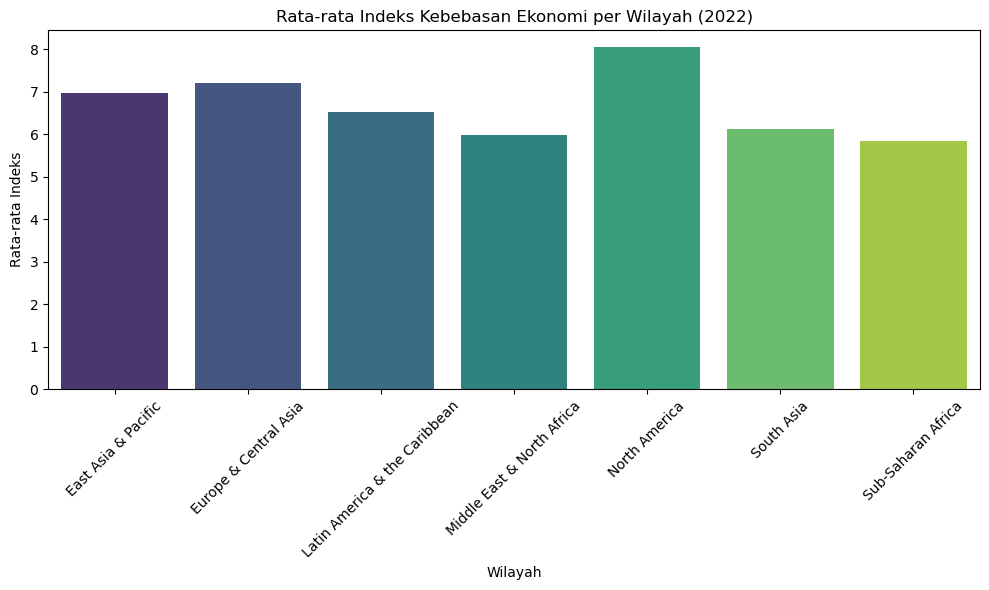

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="world_bank_region", y="Avg Economic Freedom Index", palette="viridis")
plt.xticks(rotation=45)
plt.title("Rata-rata Indeks Kebebasan Ekonomi per Wilayah (2022)")
plt.xlabel("Wilayah")
plt.ylabel("Rata-rata Indeks")
plt.tight_layout()
plt.show()


In [108]:
print(df.columns)
print(df.index.names)


Index(['Avg Economic Freedom Index'], dtype='object')
['world_bank_region']


In [109]:
df = df.reset_index()

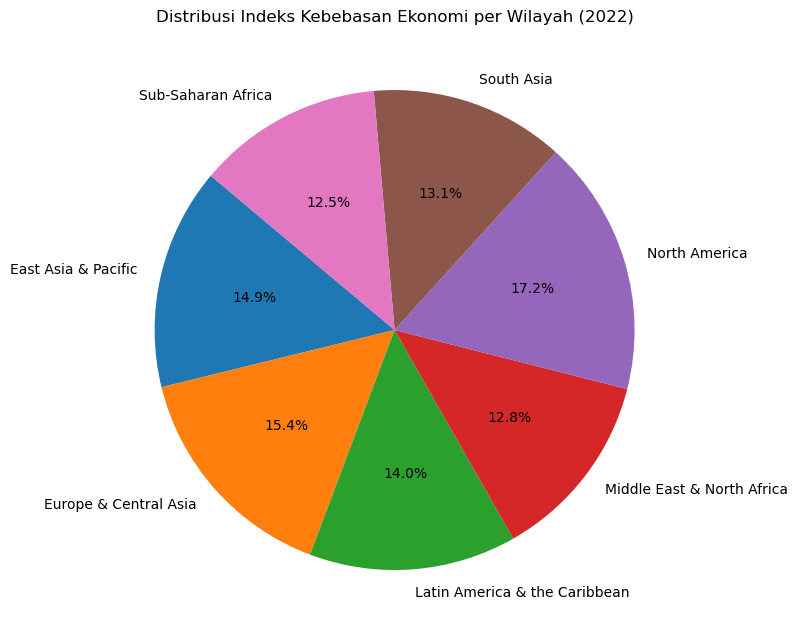

In [110]:
plt.figure(figsize=(8, 8))
plt.pie(df["Avg Economic Freedom Index"], labels=df["world_bank_region"], autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Indeks Kebebasan Ekonomi per Wilayah (2022)")
plt.tight_layout()
plt.show()


Pertanyaan ke 2

3. Bagaimana korelasi antara skor rata-rata 'Regulasi' dengan skor rata-rata 'trade freedom' di seluruh negara pada tahun 2022?

In [112]:
df_corr = cube.query(m["regulation.MEAN"], m["trade_freedom.MEAN"], levels=[l["country"]], filter=l["year"] == 2022)
df_corr

,regulation.MEAN,trade_freedom.MEAN
country,,
Albania,6.90,8.53
Algeria,4.51,3.14
Angola,5.30,2.97
Argentina,4.80,4.22
Armenia,7.10,8.08
...,...,...
"Venezuela, RB",2.54,5.03
Vietnam,6.20,6.57
"Yemen, Rep.",3.11,4.61


In [113]:
corr = df_corr["regulation.MEAN"].corr(df_corr["trade_freedom.MEAN"])
print(f"Correlation: {corr:.2f}")

Correlation: 0.75


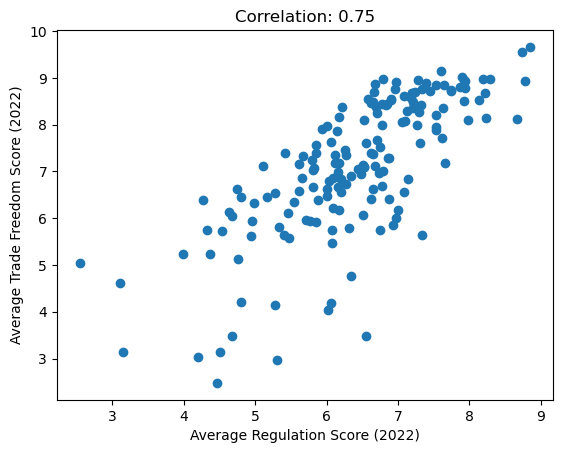

In [114]:
plt.scatter(df_corr["regulation.MEAN"], df_corr["trade_freedom.MEAN"])
plt.xlabel("Average Regulation Score (2022)")
plt.ylabel("Average Trade Freedom Score (2022)")
plt.title(f"Correlation: {corr:.2f}")
plt.show()


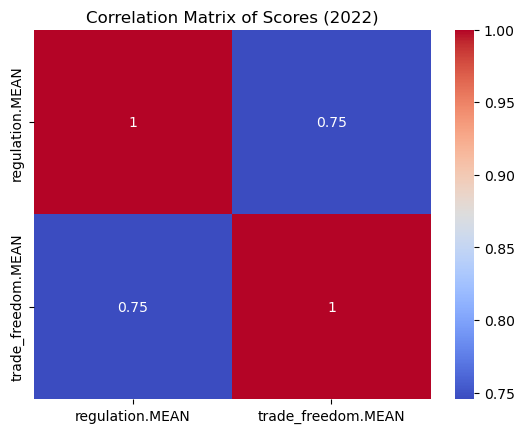

In [115]:
import seaborn as sns
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Scores (2022)")
plt.show()


Pertanyaan No 3


3. Bagaimana tren skor rata-rata 'Uang yang Sehat' (Sound Money) untuk negara-negara yang tergolong dalam kategori 'LM' (Pendapatan Menengah Bawah) selama 10 tahun terakhir (2013–2022)?


In [117]:
df_trend = cube.query(
    m["sound_money.MEAN"],
    levels=[l["year"]],
    filter=(l["income_classification"] == "LM") & (l["year"] >= 2013) & (l["year"] <= 2022)
)

df_trend

,sound_money.MEAN
year,
2013,7.39
2014,7.39
2015,7.39
2016,7.55
2017,7.40
2018,7.39
2019,7.37
2020,7.40
2021,7.18


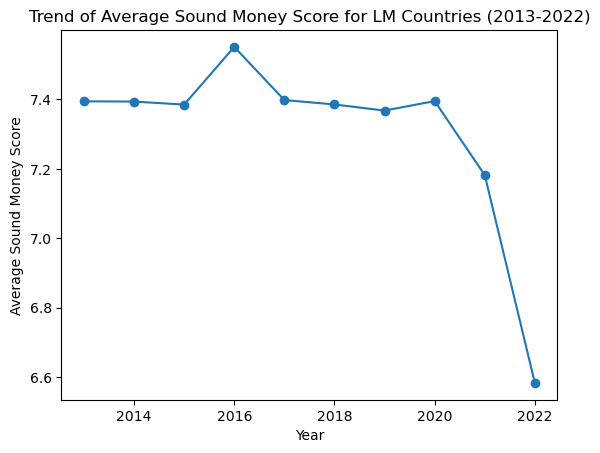

In [118]:
plt.plot(df_trend.index, df_trend["sound_money.MEAN"], marker="o")
plt.xlabel("Year")
plt.ylabel("Average Sound Money Score")
plt.title("Trend of Average Sound Money Score for LM Countries (2013-2022)")
plt.show()


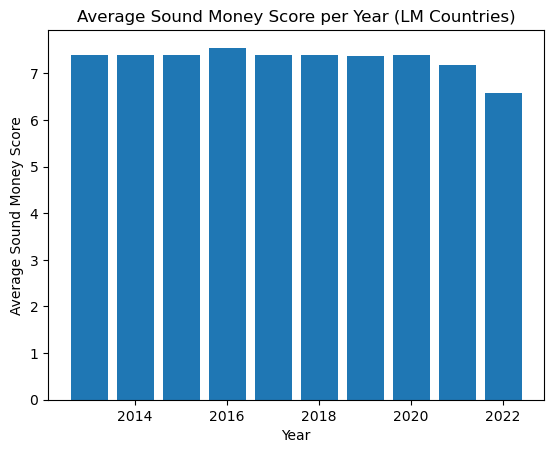

In [119]:
plt.bar(df_trend.index, df_trend["sound_money.MEAN"])
plt.xlabel("Year")
plt.ylabel("Average Sound Money Score")
plt.title("Average Sound Money Score per Year (LM Countries)")
plt.show()


Pertanyaan no 4

4. Wilayah Bank Dunia mana yang memiliki rata-rata skor 'Konsumsi Pemerintah' tertinggi pada tahun 2022?

In [121]:
query_result_df = cube.query(
    m["government_consumption.MEAN"],
    levels=[l["world_bank_region"]],
    filter=l["year"] == 2022,
)


In [122]:
print(m)

{'rank.SUM': <atoti.measure.Measure object at 0x0000023A6C11E060>, 'size_of_government.MEAN': <atoti.measure.Measure object at 0x0000023A6C11DAF0>, 'rank_sound_money.MEAN': <atoti.measure.Measure object at 0x0000023A6C1AF3B0>, 'rank_regulation.SUM': <atoti.measure.Measure object at 0x0000023A6C1AF0B0>, 'government_consumption.MEAN': <atoti.measure.Measure object at 0x0000023A6C1AF1D0>, 'legal_system.SUM': <atoti.measure.Measure object at 0x0000023A6C1AEED0>, 'tariffs.SUM': <atoti.measure.Measure object at 0x0000023A6C1AECF0>, 'quartile.SUM': <atoti.measure.Measure object at 0x0000023A6C1AE990>, 'transfers_subsidies.MEAN': <atoti.measure.Measure object at 0x0000023A6C1AE4B0>, 'transfers_subsidies.SUM': <atoti.measure.Measure object at 0x0000023A6C1AE690>, 'business_regulation.MEAN': <atoti.measure.Measure object at 0x0000023A6C1AE7B0>, 'trade_freedom.SUM': <atoti.measure.Measure object at 0x0000023A6C1AE3F0>, 'rank_regulation.MEAN': <atoti.measure.Measure object at 0x0000023A6C1AF9B0>, 

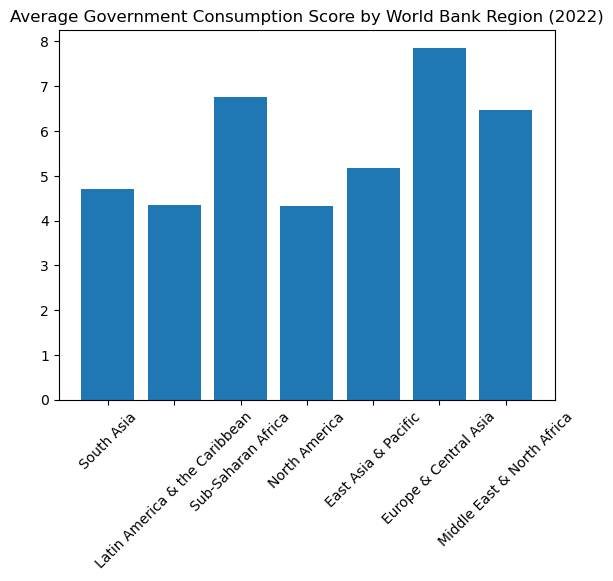

In [123]:
df_all_regions = cube.query(
    m["government_consumption.MEAN"],
    levels=[l["world_bank_region"]],
    filter=l["year"] == 2022
).sort_values("government_consumption.MEAN", ascending=False)

plt.bar(df_all_regions.index, query_result_df["government_consumption.MEAN"])
plt.xticks(rotation=45)
plt.title("Average Government Consumption Score by World Bank Region (2022)")
plt.show()


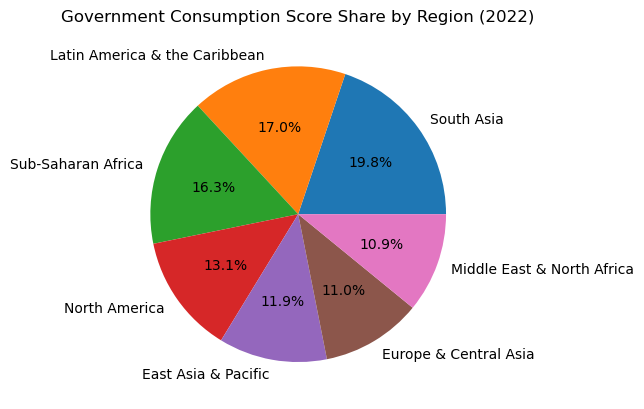

In [124]:
plt.pie(df_all_regions["government_consumption.MEAN"], labels=df_all_regions.index, autopct="%1.1f%%")
plt.title("Government Consumption Score Share by Region (2022)")
plt.show()

Pertanyaan no 5


How has the number of countries in each Income Classification changed from 2000 to 2022?

In [135]:
print(cube.levels)
print(cube.measures)

{('EconomicFreedomData', 'year', 'year'): <atoti.level.Level object at 0x0000023A6C1ADB50>, ('EconomicFreedomData', 'world_bank_region', 'world_bank_region'): <atoti.level.Level object at 0x0000023A68C00DD0>, ('EconomicFreedomData', 'country_code', 'country_code'): <atoti.level.Level object at 0x0000023A68C02EA0>, ('EconomicFreedomData', 'country', 'country'): <atoti.level.Level object at 0x0000023A6C11EA20>, ('EconomicFreedomData', 'income_classification', 'income_classification'): <atoti.level.Level object at 0x0000023A6AD55730>}
{'rank.SUM': <atoti.measure.Measure object at 0x0000023A6C1F6240>, 'size_of_government.MEAN': <atoti.measure.Measure object at 0x0000023A6C1F5D90>, 'rank_sound_money.MEAN': <atoti.measure.Measure object at 0x0000023A6C1F7C50>, 'rank_regulation.SUM': <atoti.measure.Measure object at 0x0000023A6C1F5BB0>, 'government_consumption.MEAN': <atoti.measure.Measure object at 0x0000023A6C1F74A0>, 'legal_system.SUM': <atoti.measure.Measure object at 0x0000023A6C1F54C0>,

In [157]:
cube.hierarchies["Country_Quartile_Year"] = [st["country"], store["quartile"], store["year"]]

# Lakukan query
df_labor = cube.query(
    m["labor_regulation.MEAN"],  # Pastikan measure ini memang ada
    levels=[l["country"], l["quartile"], l["year"]]
)

# Filter hasil dengan Pandas
df_labor_filtered = df_labor[
    (df_labor["quartile"] == 1.0) & (df_labor["year"] == 2022)
]

print(df_labor_filtered)

NameError: name 'store' is not defined

In [129]:
print(cube.levels["quartile"].members)
print(cube.levels["year"].members)

KeyError: 'quartile'

In [ ]:
print(store.schema)

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sortir data untuk tampilan yang lebih rapi
df_labor_sorted = df_labor.sort_values(by=m["labor_regulation.MEAN"], ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=df_labor_sorted[m["labor_regulation.MEAN"]],
    y=df_labor_sorted["country"], 
    palette="viridis"
)
plt.xlabel("Rata-rata Skor Regulasi Pasar Tenaga Kerja")
plt.ylabel("Negara")
plt.title("Skor Regulasi Pasar Tenaga Kerja untuk Negara Kuartil 1 (2022)")
plt.tight_layout()
plt.show()


NameError: name 'df_labor' is not defined

In [133]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    y=df_labor[m["labor_regulation.MEAN"]],
    color="skyblue"
)
plt.ylabel("Skor Regulasi Pasar Tenaga Kerja")
plt.title("Distribusi Skor Regulasi Pasar Tenaga Kerja (Kuartil 1, 2022)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NameError: name 'df_labor' is not defined

<Figure size 600x500 with 0 Axes>